In [1]:
import numpy  as np
import pandas as pd
#import pandas_datareader.data as web
import matplotlib 
from matplotlib import style
import datetime as dt
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Binarizer
from sklearn import svm

dataset=pd.read_csv('INRUSD1.csv')

import tensorflow
import warnings
warnings.filterwarnings('ignore')

In [2]:
#DATA PREPROCESSING
print(dataset.head(5))

print(dataset.isnull().any())
print(dataset.isnull().sum())

dataset.dtypes 

        Date   Price    Open    High     Low  Change %
0   6-Nov-19  71.010  70.769  71.036  70.769      0.33
1   5-Nov-19  70.775  70.804  70.855  70.625     -0.02
2   4-Nov-19  70.789  70.552  70.802  70.552      0.04
3   1-Nov-19  70.760  70.972  70.990  70.760     -0.31
4  31-Oct-19  70.980  70.762  71.065  70.724      0.04
Date        False
Price       False
Open        False
High        False
Low         False
Change %    False
dtype: bool
Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


Date         object
Price       float64
Open        float64
High        float64
Low         float64
Change %    float64
dtype: object

In [3]:
dataset = dataset.drop(columns=['Date' ] , axis=1)
display(dataset)
dataset.to_csv('INRUSD2.csv' , index= False)
dataset=pd.read_csv('INRUSD2.csv')
print("Co-Variance =",dataset.cov())
print("Co-Relation =",dataset.corr())

,Price,Open,High,Low,Change %
0,71.010,70.769,71.036,70.769,0.33
1,70.775,70.804,70.855,70.625,-0.02
2,70.789,70.552,70.802,70.552,0.04
3,70.760,70.972,70.990,70.760,-0.31
4,70.980,70.762,71.065,70.724,0.04
...,...,...,...,...,...
4928,46.755,46.785,46.822,46.510,0.05
4929,46.730,46.750,46.795,46.620,-0.04
4930,46.750,46.750,46.810,46.700,0.05
4931,46.725,46.825,46.845,46.725,-0.04


Co-Variance =               Price       Open       High        Low  Change %
Price     93.582872  93.658372  93.575527  93.451728  0.091338
Open      93.658372  93.781324  93.669387  93.555308  0.009690
High      93.575527  93.669387  93.591759  93.447935  0.057275
Low       93.451728  93.555308  93.447935  93.349405  0.041986
Change %   0.091338   0.009690   0.057275   0.041986  0.174311
Co-Relation =              Price      Open      High       Low  Change %
Price     1.000000  0.999747  0.999874  0.999847  0.022615
Open      0.999747  1.000000  0.999817  0.999895  0.002397
High      0.999874  0.999817  1.000000  0.999759  0.014180
Low       0.999847  0.999895  0.999759  1.000000  0.010408
Change %  0.022615  0.002397  0.014180  0.010408  1.000000


,Price,Open,High,Low,Change %
0,71.010,70.769,71.036,70.769,0.33
1,70.775,70.804,70.855,70.625,-0.02
2,70.789,70.552,70.802,70.552,0.04
3,70.760,70.972,70.990,70.760,-0.31
4,70.980,70.762,71.065,70.724,0.04


Text(0, 0.5, 'INR values')

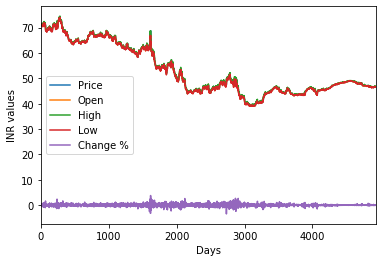

In [4]:

#dataset=pd.read_csv('11.csv')
display(dataset.head())
dataset.plot()
plt.xlabel("Days")
plt.ylabel("INR values")

In [5]:

#dataset=pd.read_csv('INRUSD2.csv')
#display(dataset.head())
#dataset.plot()
# plt.xlabel("Days")
# plt.ylabel("INR values")

In [6]:
#Rescaling


scaler=pre.MinMaxScaler(feature_range=(0,1))
rescaleData=scaler.fit_transform(dataset)
rescaleData=pd.DataFrame(rescaleData,index=dataset.index,columns=dataset.columns)
print(rescaleData)

         Price      Open      High       Low  Change %
0     0.905572  0.897821  0.901959  0.906106  0.526897
1     0.898908  0.898812  0.896821  0.901997  0.478621
2     0.899305  0.891681  0.895316  0.899914  0.486897
3     0.898483  0.903565  0.900653  0.905849  0.438621
4     0.904721  0.897623  0.902782  0.904822  0.486897
...        ...       ...       ...       ...       ...
4928  0.217780  0.219157  0.214647  0.213980  0.488276
4929  0.217071  0.218166  0.213880  0.217118  0.475862
4930  0.217638  0.218166  0.214306  0.219401  0.488276
4931  0.216929  0.220289  0.215299  0.220114  0.475862
4932  0.217496  0.216893  0.215016  0.218117  0.474483

[4933 rows x 5 columns]


In [7]:
#Standardization
# scaler=StandardScaler().fit(dataset)
# standardizedData=scaler.transform(dataset)
# standardizedData=pd.DataFrame(standardizedData,index=dataset.index,columns=dataset.columns)
# display(standardizedData)

In [8]:
#Normalization
# scaler=Normalizer().fit(dataset)
# normalizedData=scaler.transform(dataset)
# normalizedData=pd.DataFrame(normalizedData,index=dataset.index,columns=dataset.columns)
# display(normalizedData)

In [9]:
#Binarization
# binarizer=Binarizer(threshold=0.0).fit(dataset)
# binData=binarizer.transform(dataset)
# binData=pd.DataFrame(binData,index=dataset.index,columns=dataset.columns)
# display(binData)

In [10]:
#TRAINING AND TESTING 
#LINEAR REGRESSION

from sklearn.model_selection import train_test_split
x=dataset.drop('Price' , axis=1)
y=dataset.Price
#y=dataset.label
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=900)

# print("\ntrain_x:\n")
# display(train_x)
# display(train_x.shape)

# print("\ntest_x:\n")
# display(test_x)
# display(test_x.shape)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

from sklearn.linear_model import LinearRegression
from sklearn import metrics
# lr=LinearRegression()
# lr.fit(train_x, train_y)

lr=LinearRegression()
lr.fit(train_x, train_y)

predictions=lr.predict(test_x)
#display(predictions)
print(predictions[5] ,test_x)


print("Accuracy: ",lr.score(test_x, test_y))

print("intercept:",lr.intercept_)
print("coef:",lr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

(3453, 4) (1480, 4) (3453,) (1480,)
45.3700874653602         Open    High     Low  Change %
2700  48.025  48.165  47.775      0.05
253   71.995  71.995  71.715      0.09
1247  61.515  61.520  61.475      0.07
2969  42.755  43.000  42.645      0.25
378   68.330  68.330  67.718     -0.89
...      ...     ...     ...       ...
886   67.188  67.396  67.061      0.16
3977  46.200  46.470  46.200      0.15
1078  66.117  66.260  65.670     -0.31
2064  51.725  51.915  51.540      0.15
4532  48.940  48.957  48.860     -0.08

[1480 rows x 4 columns]
Accuracy:  0.9999501431116481
intercept: -0.022634187728527877
coef: [0.14595636 0.41847615 0.43575401 0.27517075]
Mean Absolute Error: 0.0481891873309054
Mean Squared Error: 0.004687604433735325
Root Mean Squared Error: 0.06846608236006589


In [11]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
df = pd.DataFrame(dataset.Price)
y =  pd.DataFrame(dataset.High)
df.shape,y.shape



kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestRegressor()

scores = []
for i in range(5):
    result = next(kf.split(df), None)
    x_train = df.iloc[result[0]]
    x_test = df.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9996710074739359, 0.9996912658563616, 0.9996700153565425, 0.999674660893931, 0.999693977723823]
Average K-Fold Score : 0.9996801854609189


In [12]:
# from matplotlib import pyplot as plt
# plt.scatter(test_y , predictions)
# plt.xlabel("True Values")
# plt.ylabel("predictions")

Text(0, 0.5, 'predictions/Price')

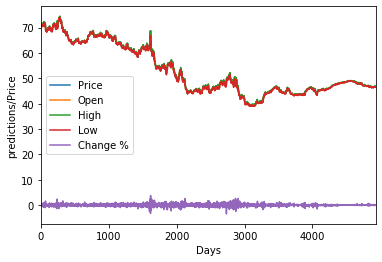

In [13]:
dataset.plot()

plt.xlabel("Days")
plt.ylabel("predictions/Price")


In [14]:
#ARIMA 


from statsmodels.tsa.arima_model import ARIMA
from random import random
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools  as ts



In [15]:
Price=dataset['Price']
print(Price)

0       71.010
1       70.775
2       70.789
3       70.760
4       70.980
         ...  
4928    46.755
4929    46.730
4930    46.750
4931    46.725
4932    46.745
Name: Price, Length: 4933, dtype: float64


0       4.262821
1       4.259506
2       4.259704
3       4.259294
4       4.262398
          ...   
4928    3.844921
4929    3.844386
4930    3.844814
4931    3.844279
4932    3.844707
Name: Price, Length: 4933, dtype: float64


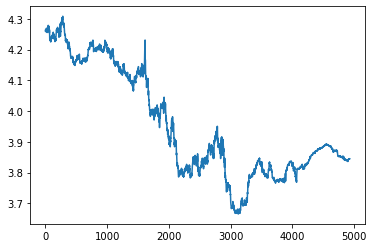

In [16]:
lnprice=np.log(Price)
print(lnprice)
plt.plot(lnprice)
plt.show()

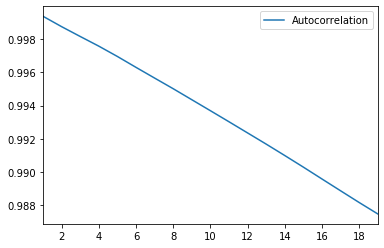

In [17]:
import pandas
acf_1=acf(lnprice) [1:20]
test_df=pandas.DataFrame([acf_1]).T
test_df.columns=['Autocorrelation']
test_df.index +=1
test_df.plot()
plt.show()

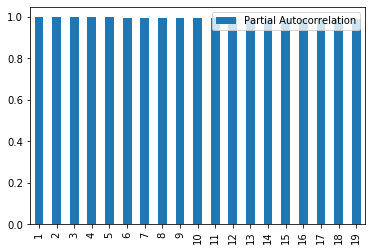

In [18]:
pacf_1=pacf(lnprice) [1:20]
test_df=pandas.DataFrame([acf_1]).T
test_df.columns=['Partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')
plt.show()

(-1.6300239564703918, 0.4674781735086474, 0, 4932, {'1%': -3.4316765828777305, '5%': -2.8621262044041633, '10%': -2.5670820376208074}, -40039.82577033836)


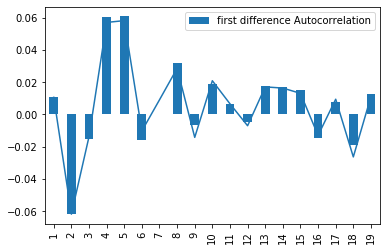

In [19]:
result=ts.adfuller(lnprice,1)
print(result)
lnprice_diff=lnprice-lnprice.shift()
diff=lnprice_diff.dropna()
acf_1_diff=acf(diff)[1:20]
test_df=pandas.DataFrame([acf_1_diff]).T
test_df.columns=['first difference Autocorrelation']
test_df.index +=1

test_df.plot(kind='bar')
pacf_1_diff=pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.show()

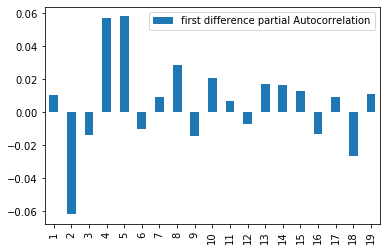

In [20]:
test_df=pandas.DataFrame([pacf_1_diff]).T

test_df.columns=['first difference partial Autocorrelation']
test_df.index +=1
test_df.plot(kind='bar')


                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                 4932
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 304.539
Method:                       css-mle   S.D. of innovations              0.227
Date:                Mon, 23 Mar 2020   AIC                           -595.078
Time:                        19:38:04   BIC                           -549.553
Sample:                             1   HQIC                          -579.111
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0049      0.003     -1.452      0.147      -0.012       0.002
ar.L1.D.Price     0.0136      0.014      0.953      0.340      -0.014       0.041
ar.L2.D.Price    -0.0783      0.014     

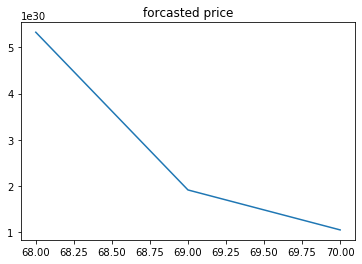

In [21]:
Price_matrix=lnprice.as_matrix()
model = ARIMA(Price, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
predictionss=model_fit.predict(68, 70, typ='levels')
print(predictionss)
predictionssadjusted=np.exp(predictionss)

print(predictionssadjusted)

plt.plot(predictionssadjusted)
plt.title('forcasted price')
plt.show()




In [22]:
predictionss.describe()

count     3.000000
mean     69.867694
std       0.821503
min      69.125658
25%      69.426302
50%      69.726946
75%      70.238712
max      70.750479
dtype: float64

In [23]:
#neural network
df=pd.read_csv('INRUSD2.csv')
df

,Price,Open,High,Low,Change %
0,71.010,70.769,71.036,70.769,0.33
1,70.775,70.804,70.855,70.625,-0.02
2,70.789,70.552,70.802,70.552,0.04
3,70.760,70.972,70.990,70.760,-0.31
4,70.980,70.762,71.065,70.724,0.04
...,...,...,...,...,...
4928,46.755,46.785,46.822,46.510,0.05
4929,46.730,46.750,46.795,46.620,-0.04
4930,46.750,46.750,46.810,46.700,0.05
4931,46.725,46.825,46.845,46.725,-0.04


In [24]:
dataset = df.values
dataset

array([[ 7.1010e+01,  7.0769e+01,  7.1036e+01,  7.0769e+01,  3.3000e-01],
       [ 7.0775e+01,  7.0804e+01,  7.0855e+01,  7.0625e+01, -2.0000e-02],
       [ 7.0789e+01,  7.0552e+01,  7.0802e+01,  7.0552e+01,  4.0000e-02],
       ...,
       [ 4.6750e+01,  4.6750e+01,  4.6810e+01,  4.6700e+01,  5.0000e-02],
       [ 4.6725e+01,  4.6825e+01,  4.6845e+01,  4.6725e+01, -4.0000e-02],
       [ 4.6745e+01,  4.6705e+01,  4.6835e+01,  4.6655e+01, -5.0000e-02]])

In [25]:
X = dataset[:,0:10]
Y = dataset[:,4]

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.9055721 , 0.89782117, 0.90195856, 0.90610556, 0.52689655],
       [0.89890827, 0.89881154, 0.89682089, 0.90199715, 0.47862069],
       [0.89930526, 0.89168081, 0.89531649, 0.89991441, 0.48689655],
       ...,
       [0.21763788, 0.21816638, 0.21430599, 0.21940086, 0.48827586],
       [0.21692897, 0.22028862, 0.21529946, 0.22011412, 0.47586207],
       [0.2174961 , 0.21689304, 0.21501561, 0.21811698, 0.47448276]])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(3453, 5) (740, 5) (740, 5) (3453,) (740,) (740,)


In [28]:
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
model = Sequential([Dense(32, activation='relu', input_shape=(5,)), Dense(32, activation='relu'), Dense(1, activation='sigmoid')])

# Dense(32, activation='relu', input_shape=(5,))
# Dense(32, activation='relu')
# Dense(1, activation='sigmoid')



model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
optimizer='sgd'
loss='binary_crossentropy'
metrics=['accuracy']

hist = model.fit(X_train, Y_train, batch_size=32, epochs=15, validation_data=(X_val, Y_val))


Train on 3453 samples, validate on 740 samples
Epoch 1/15
3453/3453 [==============================] - 2s 575us/step - loss: 0.3655 - accuracy: 0.0405 - val_loss: 0.2695 - val_accuracy: 0.0500
Epoch 2/15
3453/3453 [==============================] - 0s 74us/step - loss: 0.2613 - accuracy: 0.0455 - val_loss: 0.2138 - val_accuracy: 0.0500
Epoch 3/15
3453/3453 [==============================] - 0s 68us/step - loss: 0.2186 - accuracy: 0.0455 - val_loss: 0.1920 - val_accuracy: 0.0500
Epoch 4/15
3453/3453 [==============================] - 0s 145us/step - loss: 0.2002 - accuracy: 0.0455 - val_loss: 0.1826 - val_accuracy: 0.0500
Epoch 5/15
3453/3453 [==============================] - 0s 116us/step - loss: 0.1910 - accuracy: 0.0455 - val_loss: 0.1779 - val_accuracy: 0.0500
Epoch 6/15
3453/3453 [==============================] - 0s 78us/step - loss: 0.1859 - accuracy: 0.0455 - val_loss: 0.1753 - val_accuracy: 0.0500
Epoch 7/15
3453/3453 [==============================] - 0s 128us/step - loss: 0.

In [30]:
model.evaluate(X_test, Y_test)[1]

740/740 [==============================] - 0s 53us/step


0.03918918967247009

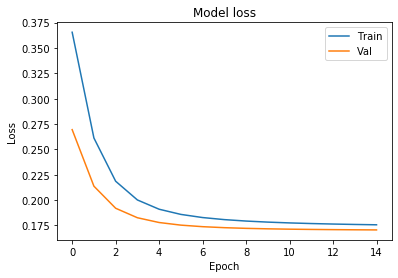

In [31]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

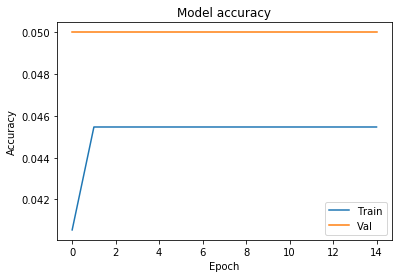

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [33]:
model_2 = Sequential([Dense(100, activation='relu', input_shape=(5,)), Dense(100, activation='relu'), Dense(100, activation='relu'), Dense(100, activation='relu'), Dense(1, activation='sigmoid'),])





model_2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])





hist_2 = model_2.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_val, Y_val))

Train on 3453 samples, validate on 740 samples
Epoch 1/10
3453/3453 [==============================] - 1s 380us/step - loss: 0.1964 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 2/10
3453/3453 [==============================] - 1s 224us/step - loss: 0.1721 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 3/10
3453/3453 [==============================] - 1s 224us/step - loss: 0.1721 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 4/10
3453/3453 [==============================] - 1s 178us/step - loss: 0.1721 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 5/10
3453/3453 [==============================] - 1s 176us/step - loss: 0.1721 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 6/10
3453/3453 [==============================] - 1s 167us/step - loss: 0.1721 - accuracy: 0.0455 - val_loss: 0.1703 - val_accuracy: 0.0500
Epoch 7/10
3453/3453 [==============================] - 1s 177us/step - loss:

8179191999

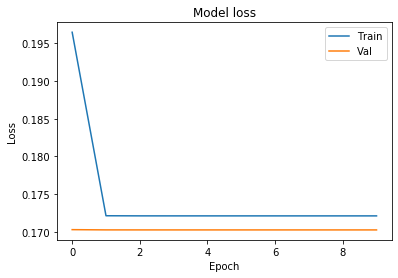

In [35]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

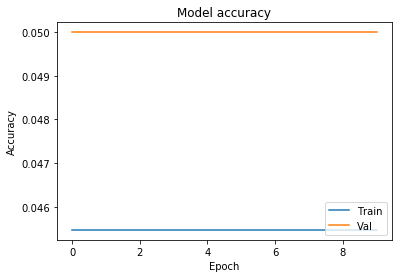

In [36]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



In [37]:
from keras.layers import Dropout 
from keras import regularizers
model_3 = Sequential([Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(5,)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3), Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),])
kernel_regularizer=regularizers.l2(0.01)
Dropout(0.3),

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_val, Y_val))


Train on 3453 samples, validate on 740 samples
Epoch 1/5
3453/3453 [==============================] - 21s 6ms/step - loss: 4.9455 - accuracy: 0.0455 - val_loss: 0.9771 - val_accuracy: 0.0500
Epoch 2/5
3453/3453 [==============================] - 21s 6ms/step - loss: -4242.3372 - accuracy: 0.0452 - val_loss: -12795.9801 - val_accuracy: 0.0500
Epoch 3/5
3453/3453 [==============================] - 19s 6ms/step - loss: -427724.1300 - accuracy: 0.0449 - val_loss: -964260.5236 - val_accuracy: 0.0486
Epoch 4/5
3453/3453 [==============================] - 20s 6ms/step - loss: -5982745.9551 - accuracy: 0.0455 - val_loss: -8384971.2921 - val_accuracy: 0.0500
Epoch 5/5
3453/3453 [==============================] - 18s 5ms/step - loss: -38411086.3436 - accuracy: 0.0455 - val_loss: -40844328.8162 - val_accuracy: 0.0500


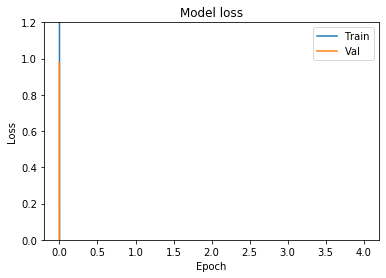

In [38]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

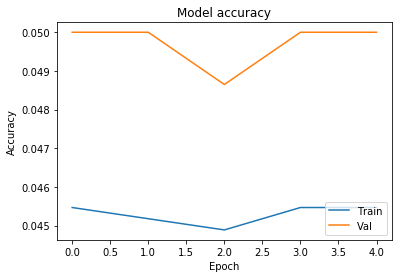

In [39]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [42]:
dataset=pd.read_csv('INRUSD2.csv')
from sklearn import svm
from sklearn.model_selection import train_test_split
x=dataset.drop('Price' , axis=1)
y=dataset.Price

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=900)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr=svm.SVR()
lr.fit(train_x, train_y)

predictions=lr.predict(test_x)
#display(predictions)
print(predictions[5] ,test_x)


print("Accuracy: ",lr.score(test_x, test_y))

print("intercept:",lr.intercept_)
#print("coef:",lr.coef_)
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

(3453, 4) (1480, 4) (3453,) (1480,)
45.37214708236509         Open    High     Low  Change %
2700  48.025  48.165  47.775      0.05
253   71.995  71.995  71.715      0.09
1247  61.515  61.520  61.475      0.07
2969  42.755  43.000  42.645      0.25
378   68.330  68.330  67.718     -0.89
...      ...     ...     ...       ...
886   67.188  67.396  67.061      0.16
3977  46.200  46.470  46.200      0.15
1078  66.117  66.260  65.670     -0.31
2064  51.725  51.915  51.540      0.15
4532  48.940  48.957  48.860     -0.08

[1480 rows x 4 columns]
Accuracy:  0.9980468522737362
intercept: [55.93307315]
Mean Absolute Error: 0.14687236472610712
Mean Squared Error: 0.1836372915369198
Root Mean Squared Error: 0.42852921900019814
